<a href="https://colab.research.google.com/github/mrcodean/start-python-/blob/main/CUSTOMER_SEGMENTATION_USING_UNSUPERVISED_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER SEGMENTATION USING UNSUPERVISED MACHINE LEARNING

## Author : Mahesram P S


## Introduction
Unsupervised learning is a type of machine learning where the goal is to find hidden patterns, structures, or relationships within a dataset that does not have labeled outcomes or target variables. In unsupervised learning, the algorithm works to understand the inherent structure of the data without the guidance of predefined labels or categories. The primary task in unsupervised learning is clustering and dimensionality reduction. This project uses the K Means Clustering method of Unsupervised learning for customer segmentation.

In this project will be clustering the customers from a customer purchase Dataset using K Means Clustering Unsupervised learning from SicKitlearn package. Unsupervised Learning does clustering with a unlabled dataset to according to similar observations from the dataset. we will also be using some evaluation metrics to find which number of clusters will be great for customer segmentation and check the Silhouette score for the distribution of the data point in the cluster.

**Objective**
 1. To build a K Means Clustering model for Customer Segmentation.
 2. To check in what number of clusters the model is efficient.
 3. To check how the clustering model is distributed with each cluster.

Methodology
 1. Data Scourced from kaggle.
 2. Using to Sci-kit learn Package to build K Means Clustering model.
 3. Evaluating using Elbow method and Silhouette score.
 4. Finally , building the suitable model.

## Importing Libraries and Dataset

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('/content/Mall_Customers.csv')

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Exploratory Data Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From the above data information we can find that there are no null values in this data set and has 200 observations which includes 4 numerical and 1 categorical value.

In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the discriptive statistics the variables are not that skeewed which leads to outliers.
 1. Average age of the individuals are 38.
 2. Average Annual Income of the individuals are 60000 $.
 3. Aveerage Spending score is 50.

## Data Processing and Visualisation.

Converting the categorical variable Gender to numerical in 0's and 1's.

In [22]:
df['Gender'] = df['Gender'].apply( lambda x : 0 if x == 'Male' else 1)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


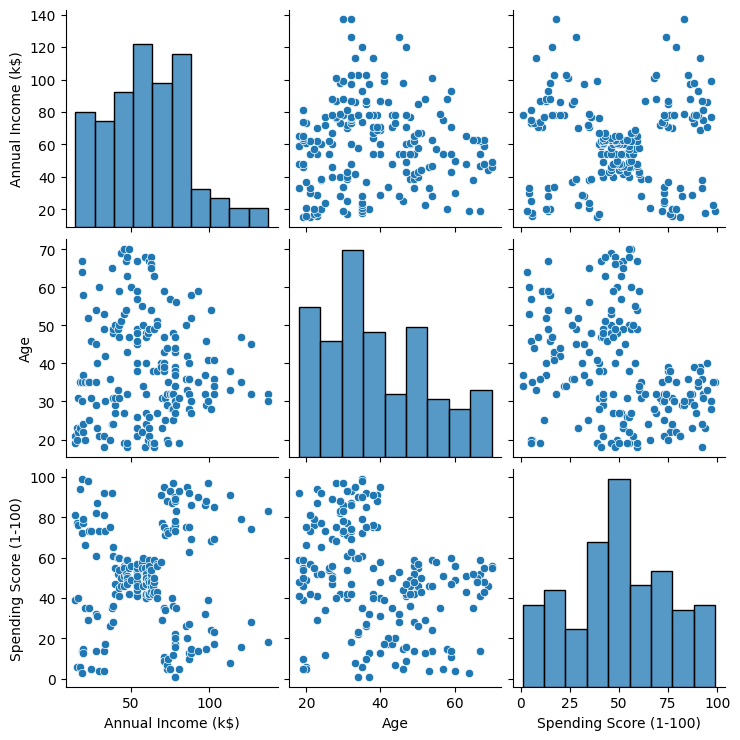

In [23]:
dfp = df[['Annual Income (k$)' , 'Age' , 'Spending Score (1-100)']]
sns.pairplot(dfp)

We are taking key varriable which will be a main factor for the customers decision, From the above plots we can find that, there is not any relationship between these three varibles and the distribution resuts are similar to the discriptive statistics.

<Axes: >

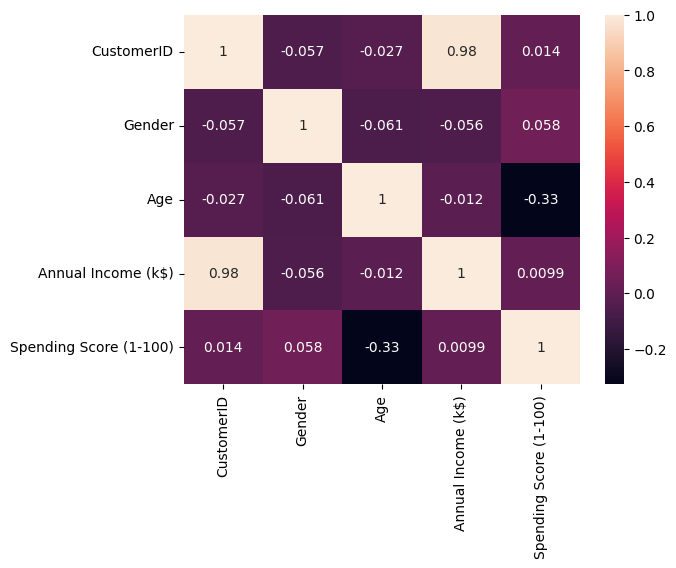

In [24]:
sns.heatmap(df.corr() , annot= True)

From the above correlation plot we can see that none have variable have high positive relationship than Annual income and customer id.

## Model development

### Pre Model

In [25]:
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(df)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

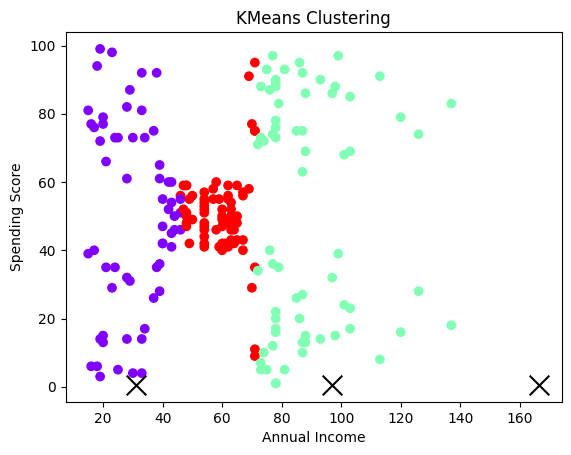

In [26]:
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=cluster_assignments, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x',
            s=200, c='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering')
plt.show()

From the above scatter plot of Annual income and Spending score we can find that the middle cluster ( violet color ) is not clustered properly. Therefore Now we will check for the optimal number of cluster to sort out this problem.

### Elbow Method

Text(0.5, 1.0, 'Elbow Method')

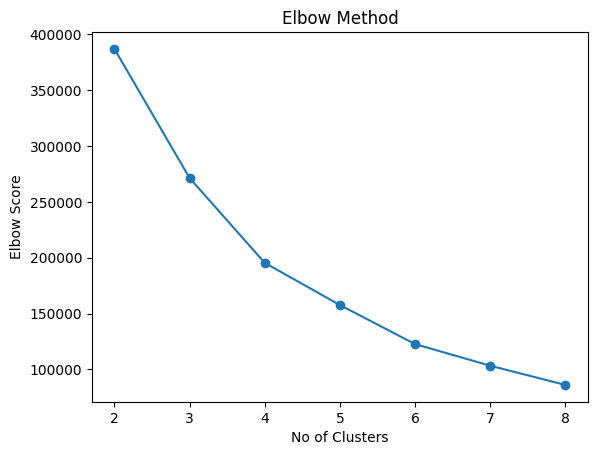

In [27]:
elb = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]
for i in n_clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  elb.append(kmeans.inertia_)

plt.plot(n_clusters , elb , marker = 'o')
plt.xlabel('No of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method')

From the result of elbow method we can find that the number of clusters don't have much significat difference model. From the 3 number of clusters the diffrence are very less. We will use Silhouette Score to find the optimal in these clusters.


 ### Silhouette Score Analysis

In [28]:
for i in n_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4793049017423563
For n_clusters=3, the silhouette score is 0.3766801400675223
For n_clusters=4, the silhouette score is 0.42245261332521894
For n_clusters=5, the silhouette score is 0.42513091704770617
For n_clusters=6, the silhouette score is 0.4119268299531371
For n_clusters=7, the silhouette score is 0.40720155265448105
For n_clusters=8, the silhouette score is 0.40550215828085007


From the result of Silhouette score we can find that the model with 2 clusters is having a good Silhouette Score comparitively. Therefore we will model again with 2 clusters.

### Final Model

In [29]:
k = 2
kmeans = KMeans(n_clusters = k)
kmeans.fit(df)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

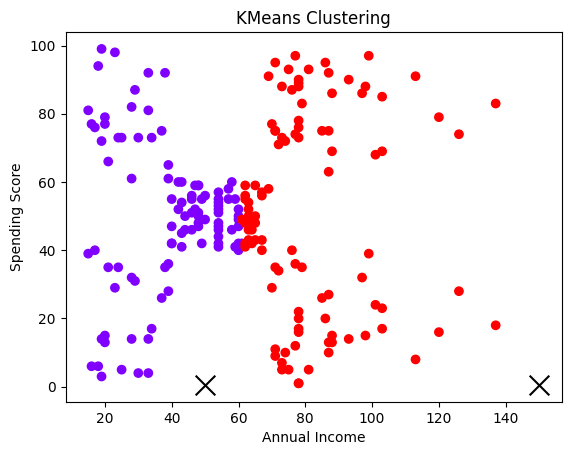

In [30]:
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=cluster_assignments, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x',
            s=200, c='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering')
plt.show()

Comparing to the old model this model is significantly better, the clusters and distributed proper. However still we can find that the there are some intersections in points.

In [31]:
df['Clusters'] = kmeans.labels_

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,1
197,198,0,32,126,74,1
198,199,0,32,137,18,1


## Results

Text(0.5, 1.0, 'Findings')

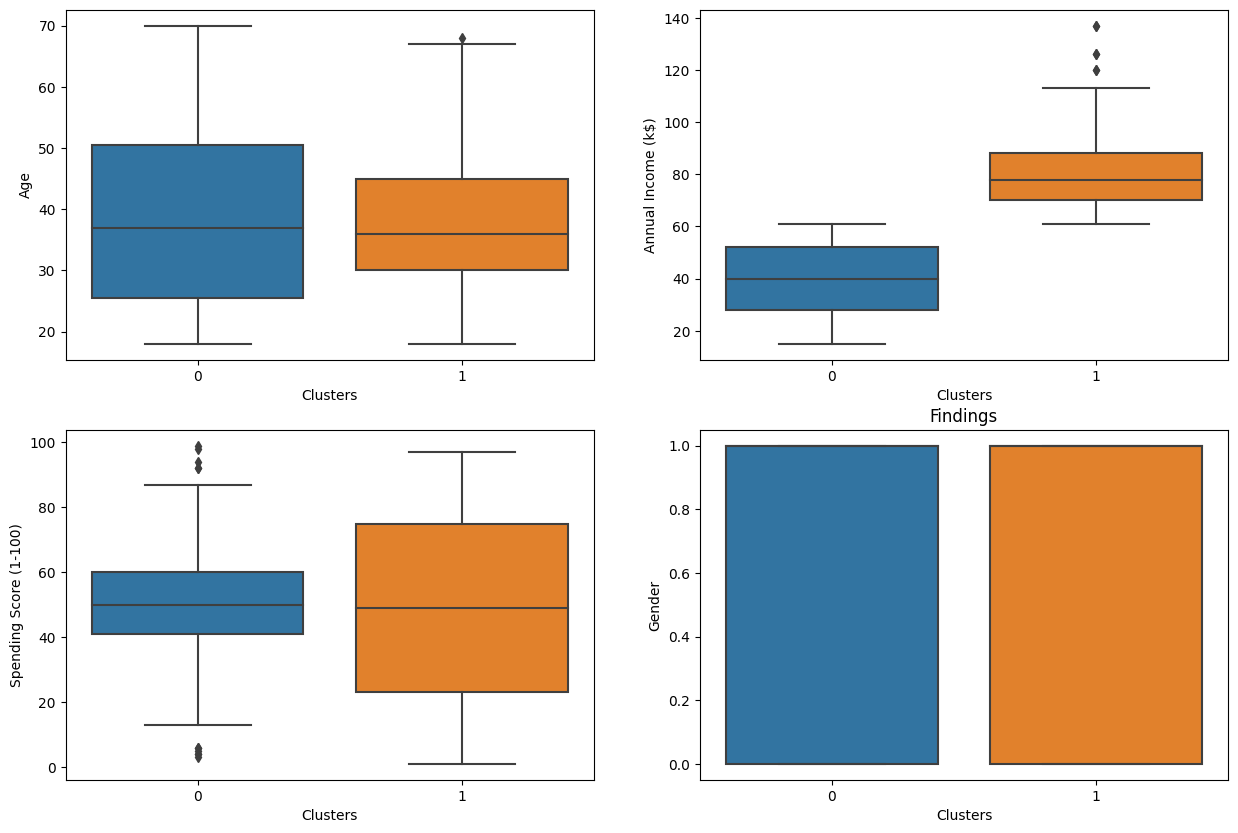

In [32]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
ax = sns.boxplot(x = df['Clusters'], y = df['Age'] , data = df)
plt.subplot(2,2,2)
ax = sns.boxplot(x = df['Clusters'], y = df['Annual Income (k$)'] , data = df)
plt.subplot(2,2,3)
ax = sns.boxplot(x = df['Clusters'], y = df['Spending Score (1-100)'] , data = df)
plt.subplot(2,2,4)
ax = sns.boxplot(x = df['Clusters'], y = df['Gender'] )

plt.title('Findings')

From the above box plot we can find that;
1. The group of customers with respect to age are similar in the both clusterss.
2. Cluster 1 have the higher income customers, which the retailer should focus on.
3. Spending score is equal for both the clusters.
4. There is equal amount of Male and Female customers.

## Conclusion

This project employed K Means Clustering, an Unsupervised Learning method, to segment customers based on purchase behavior. Using scikit-learn, the project aimed to build an effective clustering model, determine the optimal cluster count using the Elbow method, and evaluate distribution via the Silhouette score. The approach involved data sourcing from Kaggle, model construction, and rigorous evaluation, resulting in informed decisions. Descriptive analysis revealed a balanced dataset of 200 instances, while key variables like age, income, and spending were explored. Despite initial distribution issues, the model was refined using the Elbow and Silhouette methods, demonstrating Unsupervised Learning's potential for customer segmentation in business strategies.
